In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
df = pd.read_csv('/content/titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [4]:
df = df.set_index('PassengerId')

# 3. Check the basic details of the dataset

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
df.shape

(891, 11)

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

Counting all the missing values in the dataset

In [12]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

*A)  Missing value Handling in column 'Cabin'*


*   Among 891 columns, 687 Cabin values(more than 50%) are missing, so concluding we can drop the column
*   Deleting the unused columns as well.


In [13]:
df.drop(['Cabin'],axis=1,inplace=True)
df.drop(['Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


*B)  Missing value Handling in column 'Embarked'*


Filling all the missing values in the Embarked column - the column has 2 missing values and filling it with most occuring 'Embarked' value that is mode.

In [15]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

*C)  Missing value Handling in column 'Age'*


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

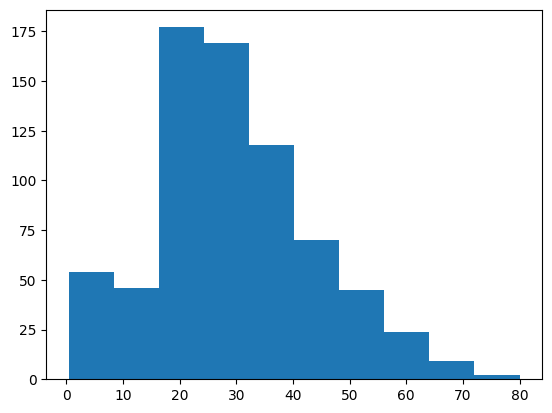

In [16]:
plt.hist(df['Age'])

Using the *‘fillna’* method for imputing the column 'Age' with the median value.
 (The median is the middlemost value)


In [17]:
df['Age']= df['Age'].fillna(df['Age'].median())

In [18]:
#     Checking if all the columns are filled
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# 5. Check and handle outliers in at least 3 columns in the dataset

## Outlier Handling for the column 'Age'

<Axes: >

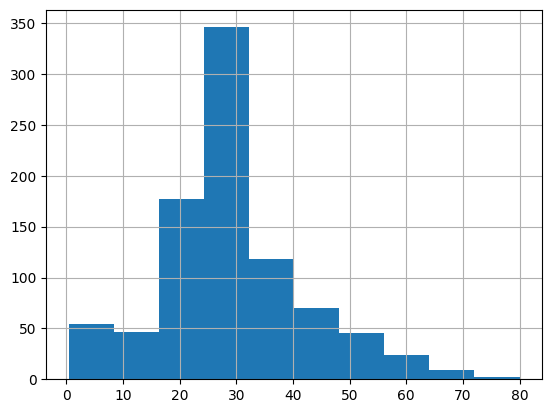

In [20]:
#   Histogram of the ‘Age’ variable.
df['Age'].hist()

Here the histogram *Right-skewed*, it indicates the presence of extreme values or outliers.

<Axes: xlabel='Age'>

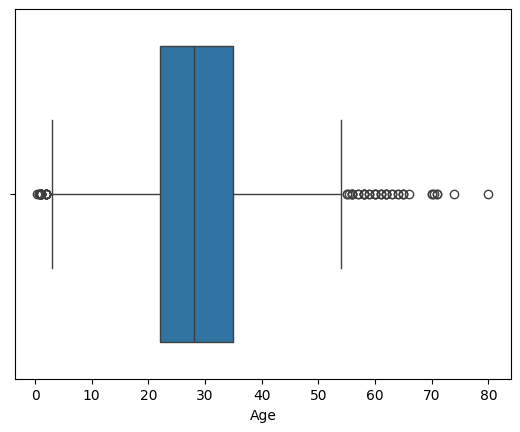

In [21]:
#   Boxplot of the 'Age' variable before outlier treatment.
sns.boxplot(x=df['Age'],data=df)

From the boxplot it is evident that there are lots of null values and outlier are present in Age feature

In [22]:
#   Checking the skewness value of the ‘Age’ variable.
df['Age'].skew()

0.5102446555756495

The range of skewness is:

-0.5 to 0.5: Normally skewed distribution

-0.5 to -1: Negatively skewed distribution

0.5 to 1: Positively skewed distribution


This is a *positively skewed distribution* as this skew value indicate the presence of outliers

So we are adopting the *'Interquartile range (IQR) method'* for handling outliers

In [23]:
#    calculating the interquartile range value of the ‘Age’ variable
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
IQR

13.0

In [24]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("Lower value: ",low_lim)
print("Upper value: ",up_lim)

Lower value:  2.5
Upper value:  54.5


In [25]:
outliers =[]
for x in df['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [26]:
df['Age'] = df['Age'].clip(lower=low_lim ,upper=up_lim)

In [27]:
outliers =[]
for x in df['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[]


<Axes: xlabel='Age'>

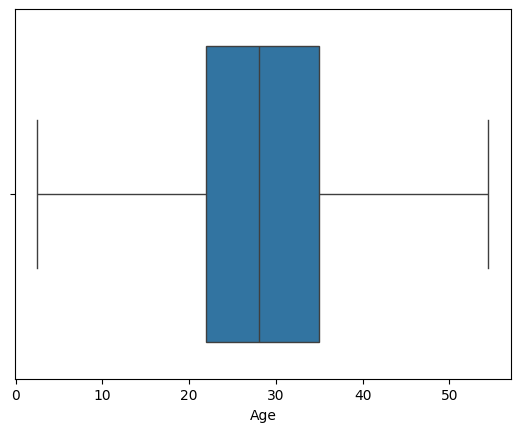

In [28]:
#   Boxplot of the ‘Age’ variable after outlier treatment.
sns.boxplot(x=df['Age'],data=df)

## Outlier Handling for the column 'Fare'





<Axes: >

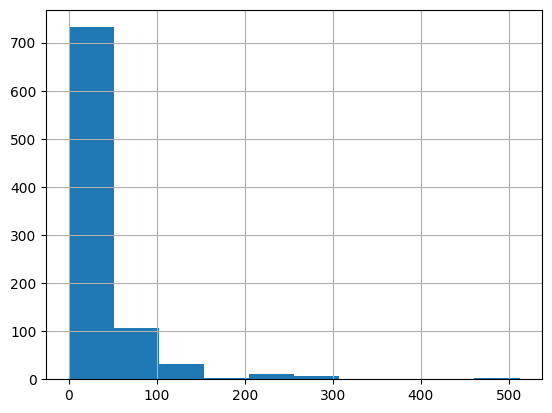

In [29]:
#   Histogram of the ‘Fare’ variable.
df['Fare'].hist()

Here the histogram *Right-skewed*, it indicates the presence of extreme values or outliers.

<Axes: xlabel='Fare'>

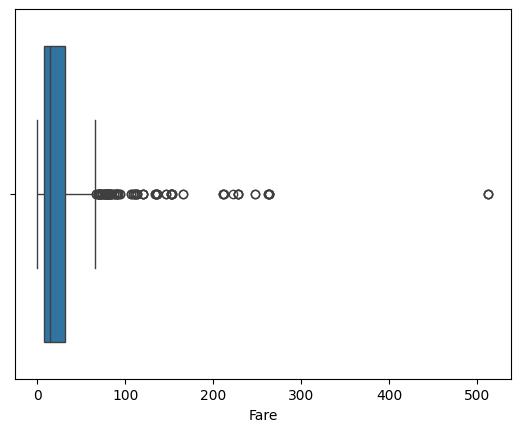

In [30]:
#   Boxplot of the ‘Fare’ variable before outlier treatment.
sns.boxplot(x=df['Fare'],data=df)

From the boxplot it is evident that there are lots of null values and outlier are present in Fare feature

In [31]:
#   Checking the skewness value of the ‘Fare’ variable.
df['Fare'].skew()

4.787316519674893

The range of skewness is:

-0.5 to 0.5: Normally skewed distribution

-0.5 to -1: Negatively skewed distribution

0.5 to 1: Positively skewed distribution


This is a *positively skewed distribution* as this skew value indicate the presence of outliers

So we are adopting the *'Interquartile range (IQR) method'* for handling outliers

In [32]:
#    calculating the interquartile range value of the ‘Fare’ variable
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

In [33]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("Lower value: ",low_lim)
print("Upper value: ",up_lim)

Lower value:  -26.724
Upper value:  65.6344


In [34]:
outliers =[]
for x in df['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [35]:
df['Fare'] = df['Fare'].clip(lower=low_lim ,upper=up_lim)

In [36]:
outliers =[]
for x in df['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[]


<Axes: xlabel='Fare'>

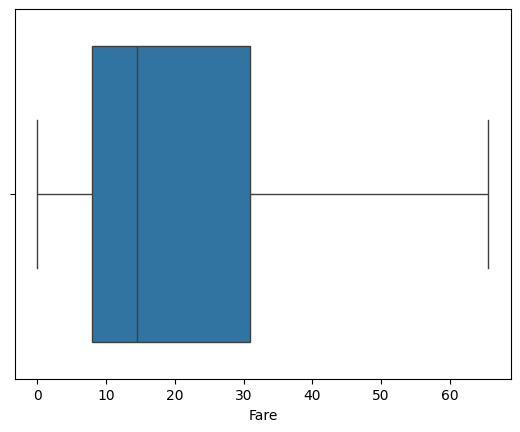

In [37]:
#   Boxplot of the ‘Fare’ variable after outlier treatment.
sns.boxplot(x=df['Fare'],data=df)

### Comparing the boxplots  before and after the treatment of the outliers, it is clear that outliers have been removed

## Outlier Handling for the column 'SibSp'

<Axes: >

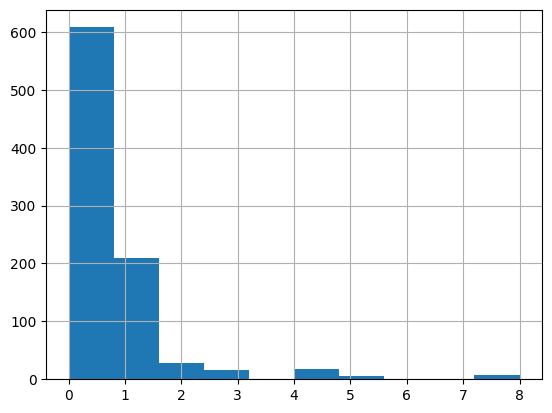

In [38]:
#   Histogram of the ‘SibSp’ variable.
df['SibSp'].hist()

Here the histogram *Right-skewed*, it indicates the presence of extreme values or outliers.

<Axes: xlabel='SibSp'>

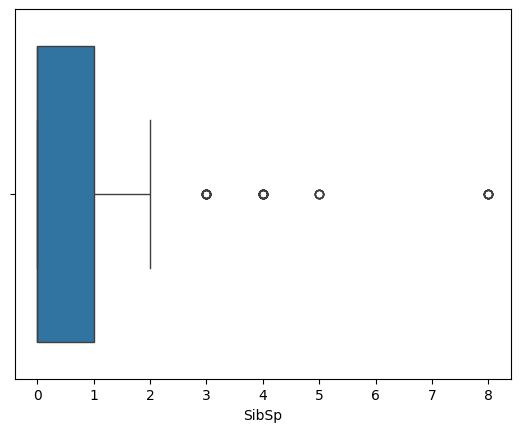

In [39]:
#   Boxplot of the ‘SibSp’ variable before outlier treatment.
sns.boxplot(x=df['SibSp'],data=df)

From the boxplot it is evident that there are lots of null values and outlier are present in SibSp feature

In [40]:
#   Checking the skewness value of the ‘SibSp’ variable.
df['SibSp'].skew()

3.6953517271630565

The range of skewness is:

-0.5 to 0.5: Normally skewed distribution

-0.5 to -1: Negatively skewed distribution

0.5 to 1: Positively skewed distribution


This is a *positively skewed distribution* as this skew value indicate the presence of outliers

So we are adopting the *'Interquartile range (IQR) method'* for handling outliers

In [41]:
#    calculating the interquartile range value of the ‘SibSp’ variable
Q1=df['SibSp'].quantile(0.25)
Q3=df['SibSp'].quantile(0.75)
IQR=Q3-Q1
IQR

1.0

In [42]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("Lower value: ",low_lim)
print("Upper value: ",up_lim)

Lower value:  -1.5
Upper value:  2.5


In [43]:
outliers =[]
for x in df['SibSp']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [44]:
df['SibSp'] = df['SibSp'].clip(lower=low_lim ,upper=up_lim)

In [45]:
outliers =[]
for x in df['SibSp']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[]


<Axes: xlabel='SibSp'>

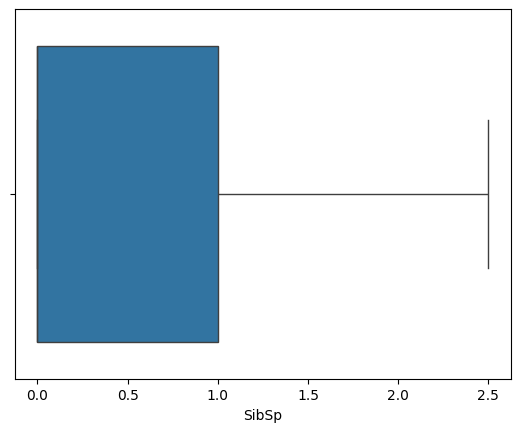

In [46]:
#   Boxplot of the ‘SibSp’ variable after outlier treatment.
sns.boxplot(x=df['SibSp'],data=df)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1.0,0,7.2500,S
2,1,1,female,38.0,1.0,0,65.6344,C
3,1,3,female,26.0,0.0,0,7.9250,S
4,1,1,female,35.0,1.0,0,53.1000,S
5,0,3,male,35.0,0.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0.0,0,13.0000,S
888,1,1,female,19.0,0.0,0,30.0000,S
889,0,3,female,28.0,1.0,2,23.4500,S


In [48]:
#   creating a dataframe X with the numerical variables
X=df[['Pclass','Age','SibSp','Parch','Fare']]

In [49]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.836071,12.072074,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()

In [52]:
X_sc = sc.fit_transform(X)

In [53]:
X_sc=pd.DataFrame(X_sc)

In [54]:
X_sc.describe()

,0,1,2,3,4
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,2.392400e-17,1.196200e-17,5.382900e-17,9.968332e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.199638e+00,-6.025120e-01,-4.736736e-01,-1.174727e+00
25%,-3.693648e-01,-5.834321e-01,-6.025120e-01,-4.736736e-01,-7.882908e-01
50%,8.273772e-01,-8.613809e-02,-6.025120e-01,-4.736736e-01,-4.686152e-01
75%,8.273772e-01,4.940382e-01,8.102200e-01,-4.736736e-01,3.396748e-01
max,8.273772e-01,2.110244e+00,2.929318e+00,6.974147e+00,2.031623e+00


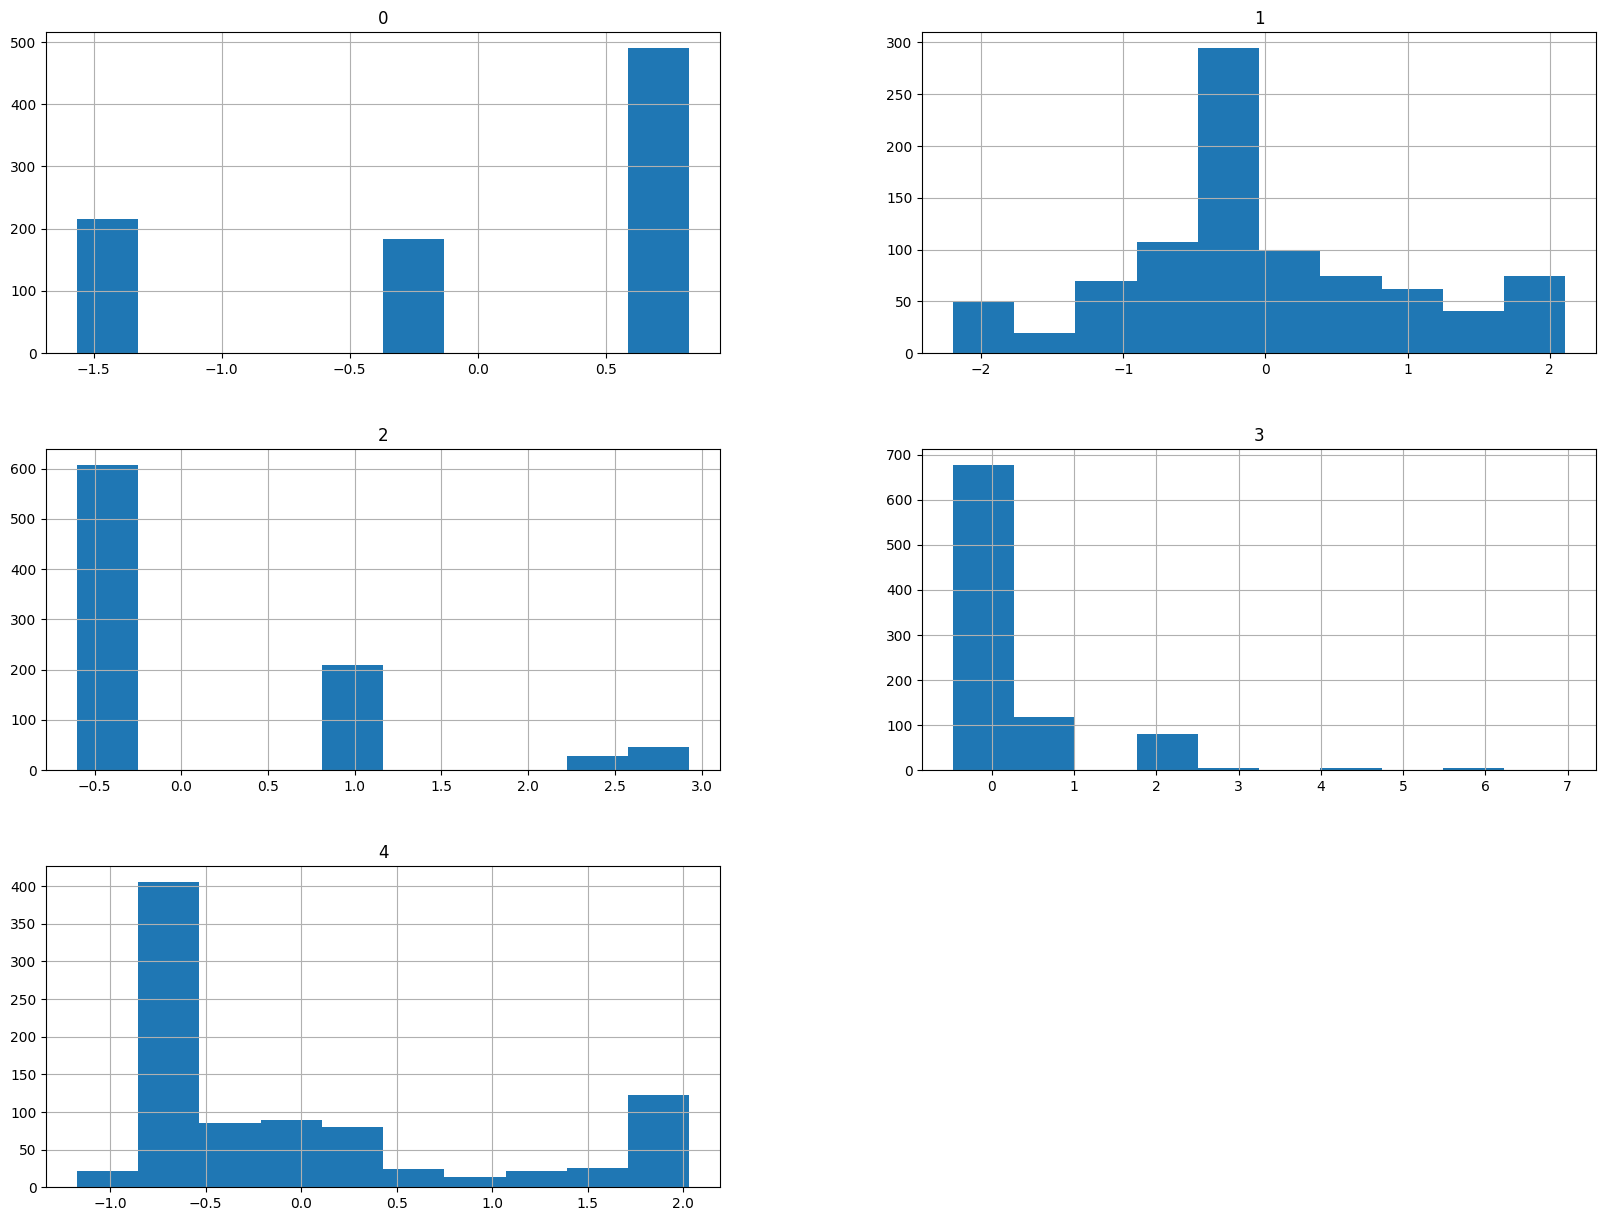

In [55]:
X_sc.hist(figsize=(20,15))
plt.show()

# Min-Max scaling

In [56]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.836071,12.072074,0.708246,0.806057,20.481625
min,1.000000,2.500000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400


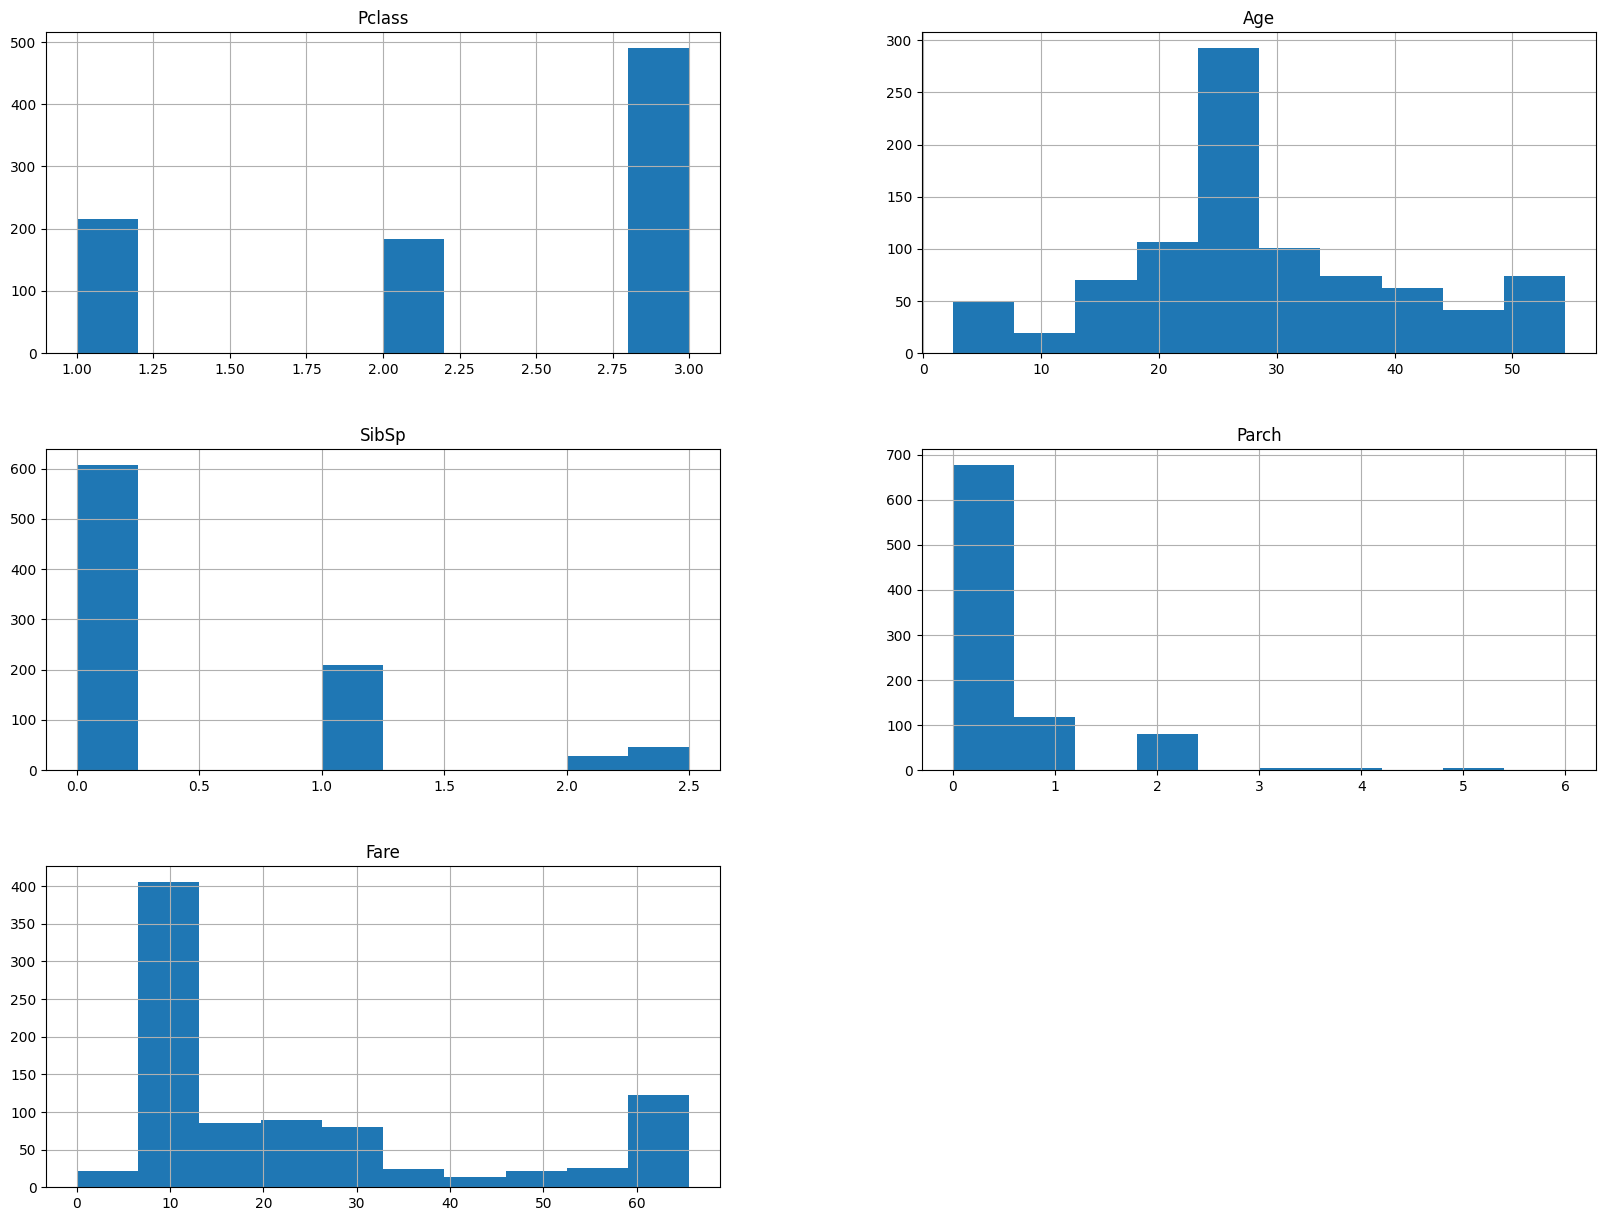

In [57]:
X.hist(figsize=(20,15))
plt.show()

In [58]:
import sklearn
minmax = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))

In [59]:
X_mm = minmax.fit_transform(X)

In [60]:
X_mm = pd.DataFrame(X_mm)

In [61]:
X_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.510371,0.170595,0.063599,0.366375
std,0.418036,0.232155,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.000000,0.000000,0.120522
50%,1.000000,0.490385,0.000000,0.000000,0.220223
75%,1.000000,0.625000,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


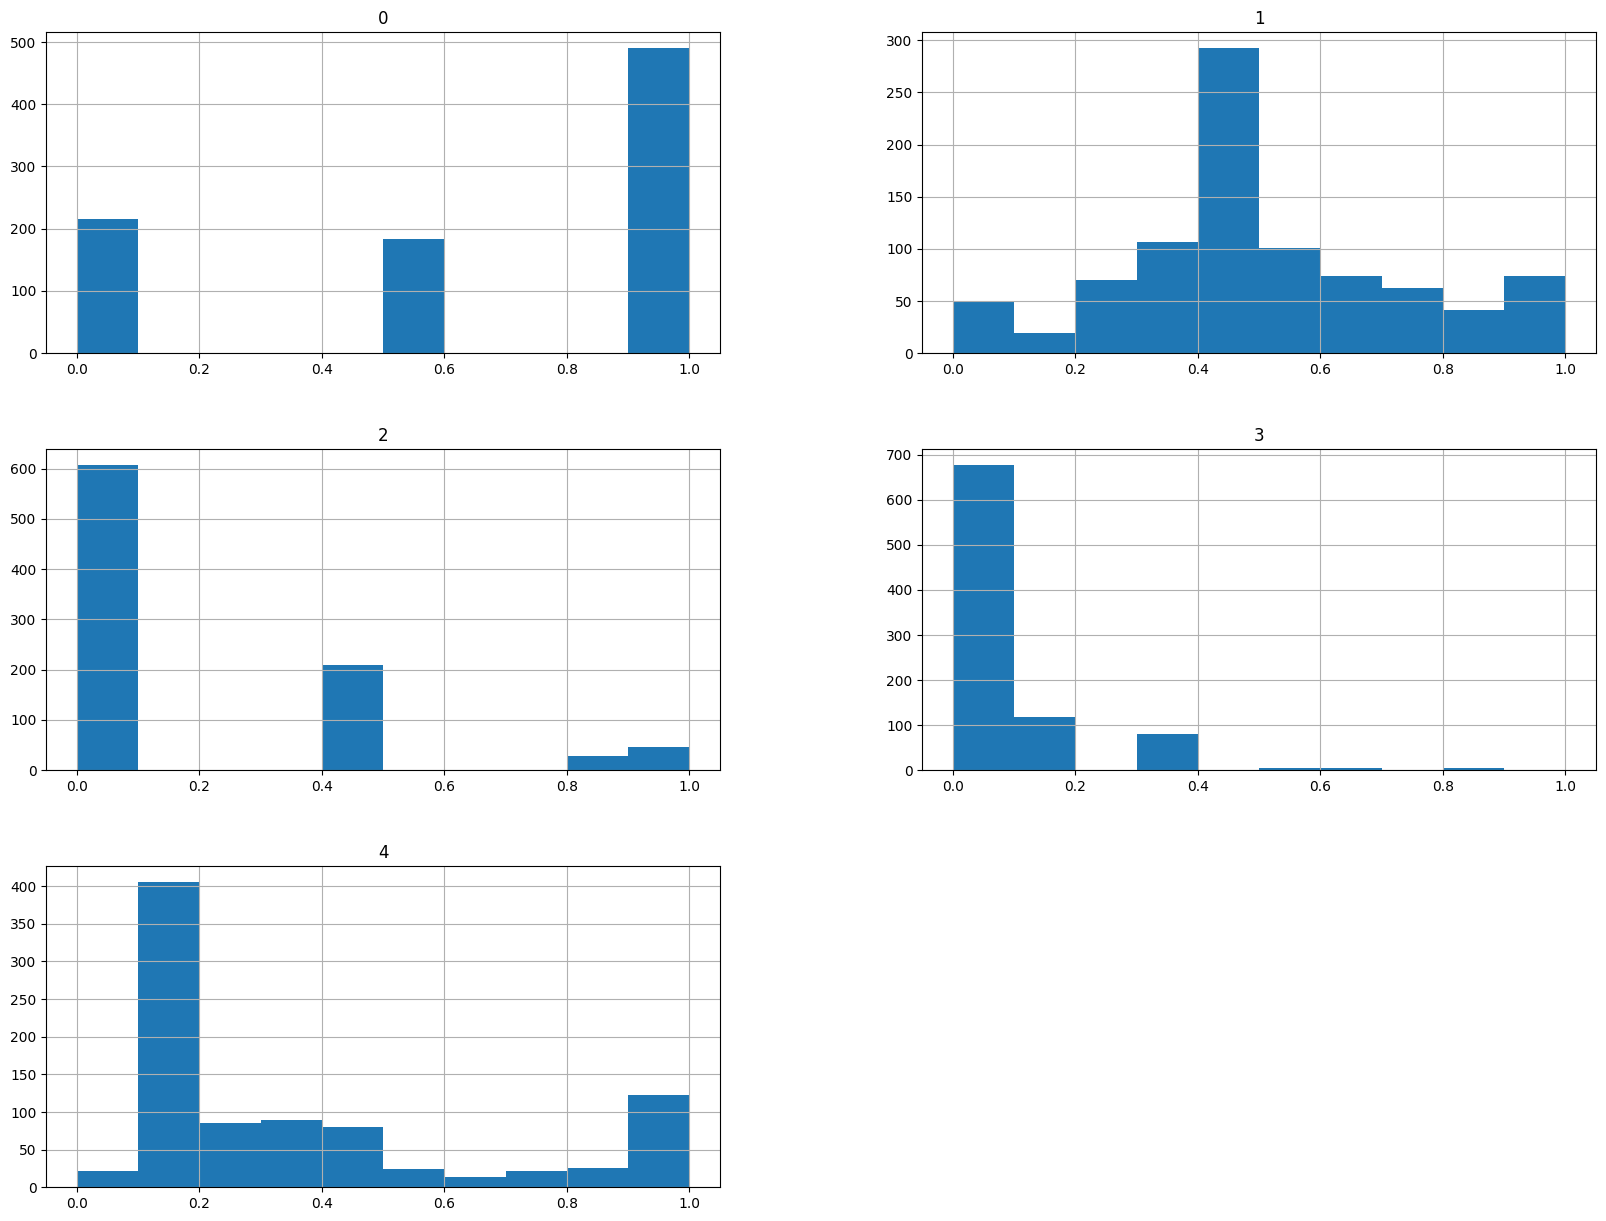

In [62]:
X_mm.hist(figsize=(20,15))
plt.show()